<a href="https://colab.research.google.com/github/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/blob/main/nonLocalMeansFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

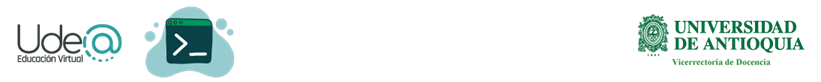

## Nonlocal Means Filter


**Tratamiento de Señales III**

**2022-1**




---



En este ejemplo, eliminamos el ruido de un detalle de la imagen del astronauta utilizando el filtro de medios no locales. El algoritmo de medios no locales reemplaza el valor de un píxel por un promedio de una selección de otros valores de píxeles: los parches pequeños centrados en los otros píxeles se comparan con el parche centrado en el píxel de interés, y el promedio se realiza solo para píxeles. que tienen parches cercanos al parche actual. Como resultado, este algoritmo puede restaurar texturas de pozos, que serían borrosas por otro algoritmo de eliminación de ruido.

Cuando el argumento fast_mode es falso, se aplica una ponderación gaussiana espacial a los parches cuando se calculan las distancias de los parches. Cuando fast_mode es True, se aplica un algoritmo más rápido que emplea una ponderación espacial uniforme en los parches.

Para cualquiera de estos casos, si se proporciona la desviación estándar del ruido, sigma, la varianza esperada del ruido se resta cuando se calculan las distancias de los parches. Esto puede conducir a una modesta mejora en la calidad de la imagen.

La función estimar_sigma puede proporcionar un buen punto de partida para configurar los parámetros h (y, opcionalmente, sigma) para el algoritmo de medias no locales. h es una constante que controla la disminución de los pesos de los parches en función de la distancia entre parches. Una h más grande permite una mayor suavización entre parches diferentes.

En esta demostración, h se ajustó a mano para brindar el mejor rendimiento aproximado de cada variante.

In [ ]:
from time import process_time

estimated noise standard deviation = 0.07787946409827638
Elapsed Time 1:  0.5425985339999997
Elapsed Time 2:  0.5197638040000001
Elapsed Time 3:  0.05291755400000042
Elapsed Time 4:  0.057145327000000634


/usr/local/lib/python3.7/dist-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


PSNR (CLEAN) = inf
PSNR (noisy) = 22.20
PSNR (slow) = 29.42
PSNR (slow, using sigma) = 29.80
PSNR (fast) = 28.42
PSNR (fast, using sigma) = 29.32


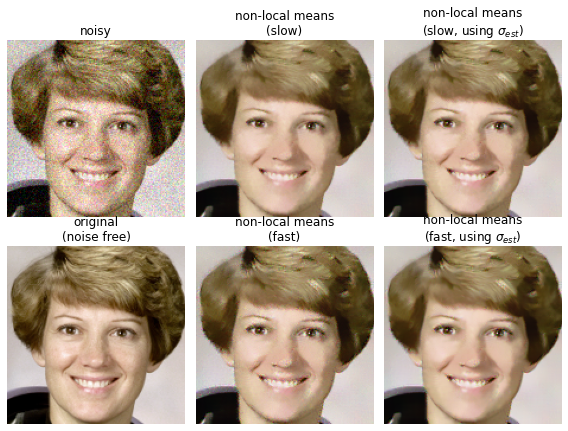

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise


astro = img_as_float(data.astronaut())
astro = astro[30:180, 150:300]

sigma = 0.08
noisy = random_noise(astro, var=sigma**2)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, multichannel = True))
print(f'estimated noise standard deviation = {sigma_est}')

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

# slow algorithm
t1_start = process_time()
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
# Stop the stopwatch / counter
t1_stop = process_time()

print('Elapsed Time 1: ',t1_stop-t1_start)

t1_start = process_time()
# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=0.8 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)
# Stop the stopwatch / counter
t1_stop = process_time()

print('Elapsed Time 2: ',t1_stop-t1_start)
# fast algorithm
t1_start = process_time()
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)
# Stop the stopwatch / counter
t1_stop = process_time()

print('Elapsed Time 3: ',t1_stop-t1_start)
# fast algorithm, sigma provided
t1_start = process_time()
denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)
# Stop the stopwatch / counter
t1_stop = process_time()

print('Elapsed Time 4: ',t1_stop-t1_start)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),
                       sharex=True, sharey=True)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise)
ax[0, 1].axis('off')
ax[0, 1].set_title('non-local means\n(slow)')
ax[0, 2].imshow(denoise2)
ax[0, 2].axis('off')
ax[0, 2].set_title('non-local means\n(slow, using $\\sigma_{est}$)')
ax[1, 0].imshow(astro)
ax[1, 0].axis('off')
ax[1, 0].set_title('original\n(noise free)')
ax[1, 1].imshow(denoise_fast)
ax[1, 1].axis('off')
ax[1, 1].set_title('non-local means\n(fast)')
ax[1, 2].imshow(denoise2_fast)
ax[1, 2].axis('off')
ax[1, 2].set_title('non-local means\n(fast, using $\\sigma_{est}$)')

fig.tight_layout()

# print PSNR metric for each case
psnr_CLEAN = peak_signal_noise_ratio(astro, astro)
psnr_noisy = peak_signal_noise_ratio(astro, noisy)
psnr = peak_signal_noise_ratio(astro, denoise)
psnr2 = peak_signal_noise_ratio(astro, denoise2)
psnr_fast = peak_signal_noise_ratio(astro, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(astro, denoise2_fast)
print(f'PSNR (CLEAN) = {psnr_CLEAN:0.2f}')
print(f'PSNR (noisy) = {psnr_noisy:0.2f}')
print(f'PSNR (slow) = {psnr:0.2f}')
print(f'PSNR (slow, using sigma) = {psnr2:0.2f}')
print(f'PSNR (fast) = {psnr_fast:0.2f}')
print(f'PSNR (fast, using sigma) = {psnr2_fast:0.2f}')

plt.show()

## Discusión

|Method| Elapsed Time | PSNR |
|-------|------|-------|
| Slow  | $0.5426$ | $0.2942$|
| Slow with $\sigma_{est}$ | $0.5426$ | $0.2942$|



